In [1]:
# Import necessary libraries
import re
import pickle
import pandas as pd                                # Data manipulation
import seaborn as sns                              # Plotting
import matplotlib.pyplot as plt
import numpy as np                                 # Mathematical operations
import re                                          # Regular expressions
import string                                      # String manipulation
import nltk
import contractions                                # Expanding Contractions
import unidecode                                   
from wordcloud import WordCloud
from bs4 import BeautifulSoup                      # To extract URLs
from nltk.corpus import stopwords

# For stemming and lemmatization
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Importing the dataset
columns  = ["sentiment", "ids", "date", "flag", "user", "text"]
data_encoding = "ISO-8859-1"
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                      encoding=data_encoding , names=columns)
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Removing the unnecessary columns.
df = df[['sentiment','text']]

In [4]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [5]:
# Replacing the values.
df['sentiment'] = df['sentiment'].replace(0,"negative")
df['sentiment'] = df['sentiment'].replace(4,"positive")

In [6]:
df['sentiment'].value_counts()

negative    800000
positive    800000
Name: sentiment, dtype: int64

In [7]:
df

,sentiment,text
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,is upset that he can't update his Facebook by ...
2,negative,@Kenichan I dived many times for the ball. Man...
3,negative,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,positive,Just woke up. Having no school is the best fee...
1599996,positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,positive,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
# Size of the dataframe
df.shape

(1600000, 2)

In [9]:
# Summary statistics of the dataframe
df.describe()

,sentiment,text
count,1600000,1600000
unique,2,1581466
top,negative,isPlayer Has Died! Sorry
freq,800000,210


In [10]:
# Displaying rows with duplicate tweets
duplicate = df[df.duplicated()]
duplicate

,sentiment,text
1940,negative,and so the editing of 3000 wedding shots begins
2149,negative,"im lonely keep me company! 22 female, california"
3743,negative,I'm not liking that new iTunes Pricing at all....
3746,negative,"cant eat, drink or breath properly thanks to t..."
4163,negative,has a cold
...,...,...
1599450,positive,Good morning!
1599501,positive,getting used to twitter
1599531,positive,@KhloeKardashian Definitely my Mom. And Angeli...
1599678,positive,goodmorning


In [11]:
# Removing duplicate rows
df = df.drop_duplicates(keep = 'first')

In [12]:
# Size of the resulting dataframe after removing duplicates
df.shape

(1583691, 2)

In [13]:
# Checking for null values
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [14]:
df['sentiment'].value_counts()

positive    793506
negative    790185
Name: sentiment, dtype: int64

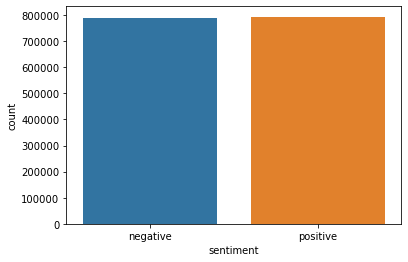

In [15]:
# Bar plot showing the sentiment counts
sns.countplot(x='sentiment', data = df)
plt.show()

In [16]:
df1 = df.copy()

In [17]:
# Exploration of the count of words and unique words in each tweet
df1["word_count"] = df1["text"].apply(lambda x: len(str(x).split()))
df1["unique_word_count"] = df1["text"].apply(lambda x: len(set(str(x).split())))

In [18]:
df1

,sentiment,text,word_count,unique_word_count
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,19
1,negative,is upset that he can't update his Facebook by ...,21,21
2,negative,@Kenichan I dived many times for the ball. Man...,18,18
3,negative,my whole body feels itchy and like its on fire,10,10
4,negative,"@nationwideclass no, it's not behaving at all....",21,21
...,...,...,...,...
1599995,positive,Just woke up. Having no school is the best fee...,11,11
1599996,positive,TheWDB.com - Very cool to hear old Walt interv...,11,11
1599997,positive,Are you ready for your MoJo Makeover? Ask me f...,11,10
1599998,positive,Happy 38th Birthday to my boo of alll time!!! ...,12,12


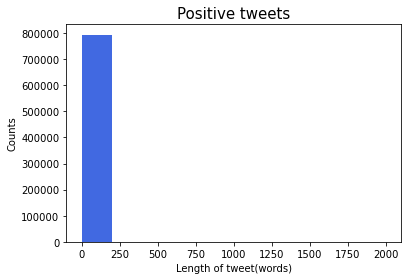

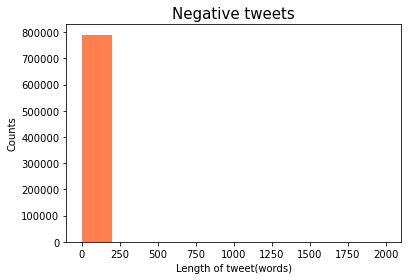

In [19]:
# Plot showing the length of each review in the positive sentiment
plt.hist(df1[df1['sentiment']=='positive']['word_count'],range=(0,2000),color='royalblue')
plt.title('Positive tweets', fontsize=15)
plt.xlabel('Length of tweet(words)',fontsize=10)                                
plt.ylabel('Counts',fontsize=10)    
plt.show()

# Plot showing the length of each review in the negative sentiment
plt.hist(df1[df1['sentiment']=='negative']['word_count'],range=(0,2000),color='coral')
plt.title('Negative tweets', fontsize=15)
plt.xlabel('Length of tweet(words)',fontsize=10)                                
plt.ylabel('Counts',fontsize=10)    
plt.show()

In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Checking the count of the below mentioned cases in each tweet
df1["upper_case_count"] = df1["text"].apply(lambda x: len([word for word in str(x).split() if word.istitle()]))
df1["stopwords_count"] = df1["text"].apply(lambda x: len([word for word in str(x).split() if word in stop_words]))
df1["punctuation_count"] = df1["text"].apply(lambda x: len([punc for punc in str(x) if punc in string.punctuation]))
df1["url_count"] = df1["text"].apply(lambda x: len(re.findall(r'(http?://\S+|www\.\S+)', x )))
df1["html_count"] = df1["text"].apply(lambda x: len(re.findall(r'(<.*?>+)', x ))) 
df1["ascii_count"] = df1["text"].apply(lambda x: len(x) == len(x.encode()))
df1["handle_count"] = df1["text"].apply(lambda x: len(re.findall(r'(@[\w]+)', x )))
df1["wordnum_count"] = df1["text"].apply(lambda x: len(re.findall(r'\w*\d\w*', x )))
df1["hashtag_count"] = df1["text"].apply(lambda x: len(re.findall(r'(#\w+)', x)))


In [22]:
df1

,sentiment,text,word_count,unique_word_count,upper_case_count,stopwords_count,punctuation_count,url_count,html_count,ascii_count,handle_count,wordnum_count,hashtag_count
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,19,7,4,12,1,0,True,1,1,0
1,negative,is upset that he can't update his Facebook by ...,21,21,3,8,6,0,0,True,0,0,0
2,negative,@Kenichan I dived many times for the ball. Man...,18,18,4,5,3,0,0,True,1,1,0
3,negative,my whole body feels itchy and like its on fire,10,10,0,4,0,0,0,True,0,0,0
4,negative,"@nationwideclass no, it's not behaving at all....",21,21,1,10,9,0,0,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,positive,Just woke up. Having no school is the best fee...,11,11,2,3,1,0,0,True,0,0,0
1599996,positive,TheWDB.com - Very cool to hear old Walt interv...,11,11,2,1,9,1,0,False,0,1,0
1599997,positive,Are you ready for your MoJo Makeover? Ask me f...,11,10,3,5,1,0,0,True,0,0,0
1599998,positive,Happy 38th Birthday to my boo of alll time!!! ...,12,12,5,3,3,0,0,True,0,1,0


In [23]:
df1.loc[df1['url_count'] > 0]

,sentiment,text,word_count,unique_word_count,upper_case_count,stopwords_count,punctuation_count,url_count,html_count,ascii_count,handle_count,wordnum_count,hashtag_count
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,19,7,4,12,1,0,True,1,1,0
37,negative,@MissXu sorry! bed time came here (GMT+1) ht...,8,8,0,1,10,1,0,True,1,1,0
50,negative,Broadband plan 'a massive broken promise' http...,15,15,2,3,11,2,0,True,0,1,0
74,negative,Why won't you show my location?! http://twit...,7,7,1,3,8,1,0,True,0,1,0
95,negative,Strider is a sick little puppy http://apps.fa...,7,7,1,2,9,1,0,True,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599961,positive,@crgrs359 Skip the aquarium and check out thes...,14,14,2,4,6,1,0,True,1,2,0
1599973,positive,http://twitpic.com/7jp4n - OMG! Office Space.....,9,9,3,0,11,1,0,True,0,1,0
1599981,positive,Another Commenting Contest! [;: Yay!!! http:/...,6,6,4,0,12,1,0,True,0,1,0
1599985,positive,"if ur the lead singer in a band, beware fallin...",19,19,1,5,13,1,0,True,0,1,2


# Pre processing

### Contractions

In [28]:
df1['text'][1]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [29]:
# Expanding contractions in the tweets using the contractions library
tracker = 1

def replace_contractions(text):
    """
    Expands contractions found in the tweets
    
    Parameters
    -------------------
    text: variable containing text
    
    Returns
    -------------------
    tweet with expanded words
    """
    global tracker
    if tracker % 100 == 0:
        print("Progress",str(np.round((tracker/len(df1))*100)) + '%', end = '\r' ) # A progression tracker to show the 
                                                                                     # % completion of the task
    tracker += 1
    return contractions.fix(text)

In [30]:
# This step of expanding the contractions will take some time depending on the machine's hardware
df1['text'] = df1['text'].apply(replace_contractions)

In [33]:
def remove_handles(text):
    
    pattern =  re.compile(r'@[\w]+')
    return pattern.sub(r' ', text)

In [34]:
df1['text'] = df1['text'].apply(remove_handles)

In [35]:
def remove_numwords(text):
    pattern = re.compile(r'\w*\d\w*')
    return pattern.sub(r' ', text)

In [36]:
# remove numbers
df1['text'] = df1['text'].apply(lambda x: re.sub(r"\d+", " ", x))

In [37]:
def remove_urls(text):
    """
    Removes URLs in text
    
    Parameters
    -------------------
    text: variable containing text
    
    Returns
    -------------------
    A clean tweet without URLs
    """
    pattern = re.compile(r'http?://\S+|www\.\S+')
    return pattern.sub(r' ', text)

In [38]:
df1['text'] = df1['text'].apply(remove_urls)

In [39]:
def remove_unicode(text):
    """
    Converts Non ASCII characters to ASCII format
    
    Parameters
    -------------------
    text: variable containing text
    
    Returns
    -------------------
    A clean tweet in ASCII format
    """
    text = unidecode.unidecode(text)
    return text

In [40]:
df1['text'] = df1['text'].apply(remove_unicode)

In [41]:
def remove_html_tags(text):
    """
    Removes HTML tags in each tweet
    
    Parameters
    -------------------
    text: variable containing text
    
    Returns
    -------------------
    A clean tweet without HTML tags
    """
    soup = BeautifulSoup(text,'html.parser')
    rev = soup.get_text()
    return rev

In [42]:
df1['text'] = df1['text'].apply(remove_html_tags)

C:\Users\Kiran\anaconda3\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [43]:
def remove_hashtags(text):
    """
    Removes URLs in text
    
    Parameters
    -------------------
    text: variable containingtext
    
    Returns
    -------------------
    A clean tweet without URLs
    """
    pattern = re.compile(r'#\w+')
    return pattern.sub(r' ', text)

In [44]:
df1["text"] = df1["text"].apply(remove_hashtags)

In [45]:
def remove_spcl_chars(text):
    """
    Removes special characters
    
    Parameters
    -------------------
    text: variable containing text
    
    Returns
    -------------------
    A clean tweet without special characters
    """
    return re.sub('[^a-zA-Z0-9]', ' ', text) 

In [46]:
df1['text'] = df1['text'].apply(remove_spcl_chars)

In [47]:
# removes remaining one-letter words and two letters words 
df1['text'] = df1['text'].apply(lambda x: re.sub(r'\b\w{1,2}\b', " ", x))

In [48]:
# remove extra spaces
def remove_extraspace(text):
    return re.sub("\s\s+", " ", text)

In [49]:
df1['text'] = df1['text'].apply(remove_extraspace)

In [50]:
# Converting all words to lowercase to avoid dissimilarity between same words eg: "The" and "the"
df1['text'] = df1['text'].str.lower()     # Case Normalization

In [51]:
# Excluding certain stopwords so that they do not affect the meaning
stop_words.remove('not')
stop_words.remove('no')

def remove_stopwords(text):
    """
    Removes stopwords
    
    Parameters
    -------------------
    text: variable containing text
    
    Returns
    -------------------
    A clean tweet without stopwords
    """
    words = text.split(' ')
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [52]:
df1['text'] = df1['text'].apply(remove_stopwords)

In [53]:
# Checking if the preprocessing steps were completed successfully

df1["upper_case_count"] = df1["text"].apply(lambda x: len([word for word in str(x).split() if word.istitle()]))
df1["stopwords_count"] = df1["text"].apply(lambda x: len([word for word in str(x).split() if word in stop_words]))
df1["punctuation_count"] = df1["text"].apply(lambda x: len([punc for punc in str(x) if punc in string.punctuation]))
df1["url_count"] = df1["text"].apply(lambda x: len(re.findall(r'(http?://\S+|www\.\S+)', x )))
df1["html_count"] = df1["text"].apply(lambda x: len(re.findall(r'(<.*?>+)', x ))) 
df1["ascii_count"] = df1["text"].apply(lambda x: len(x) == len(x.encode()))
df1["handle_count"] = df1["text"].apply(lambda x: len(re.findall(r'(@[\w]+)', x )))
df1["wordnum_count"] = df1["text"].apply(lambda x: len(re.findall(r'\w*\d\w*', x )))
df1["hashtag_count"] = df1["text"].apply(lambda x: len(re.findall(r'(#\w+)', x)))

In [54]:
df1

,sentiment,text,word_count,unique_word_count,upper_case_count,stopwords_count,punctuation_count,url_count,html_count,ascii_count,handle_count,wordnum_count,hashtag_count
0,negative,awww bummer shoulda got david carr third day,19,19,0,0,0,0,0,True,0,0,0
1,negative,upset cannot update facebook texting might cr...,21,21,0,0,0,0,0,True,0,0,0
2,negative,dived many times ball managed save rest bounds,18,18,0,0,0,0,0,True,0,0,0
3,negative,whole body feels itchy like fire,10,10,0,0,0,0,0,True,0,0,0
4,negative,not behaving mad cannot see,21,21,0,0,0,0,0,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,positive,woke school best feeling ever,11,11,0,0,0,0,0,True,0,0,0
1599996,positive,thewdb com cool hear old walt interviews bmta,11,11,0,0,0,0,0,True,0,0,0
1599997,positive,ready mojo makeover ask details,11,10,0,0,0,0,0,True,0,0,0
1599998,positive,happy birthday boo alll time tupac amaru shakur,12,12,0,0,0,0,0,True,0,0,0


In [62]:
df1.loc[df1['text'] == ''] # checking rows with no words at all

,sentiment,text,word_count,unique_word_count,upper_case_count,stopwords_count,punctuation_count,url_count,html_count,ascii_count,handle_count,wordnum_count,hashtag_count
83,negative,,4,4,0,0,0,0,0,True,0,0,0
191,negative,,3,3,0,0,0,0,0,True,0,0,0
208,negative,,1,1,0,0,0,0,0,True,0,0,0
249,negative,,1,1,0,0,0,0,0,True,0,0,0
282,negative,,2,2,0,0,0,0,0,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598921,positive,,2,2,0,0,0,0,0,True,0,0,0
1599494,positive,,1,1,0,0,0,0,0,True,0,0,0
1599552,positive,,3,3,0,0,0,0,0,True,0,0,0
1599811,positive,,4,4,0,0,0,0,0,True,0,0,0


In [63]:
df1.shape

(1583691, 13)

In [64]:
df1['text'][1599996] # contains non english words

'thewdb com cool hear old walt interviews bmta'

In [65]:
df1['text'][95]

'strider sick little puppy'

In [66]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [67]:
words = set(nltk.corpus.words.words())

In [68]:
def remove_noneng(text):
    """
    Removes stopwords
    
    Parameters
    -------------------
    text: variable containing df1 text
    
    Returns
    -------------------
    A clean review without non english words
    """
    
    return " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())

In [69]:
df1['text'] = df1['text'].apply(remove_noneng)

In [70]:
df1['text'][841851]

'missing red glad good show ladies'

In [71]:
df1['text'][841855]

'fun cannot wait'

In [72]:
df1['text'][89]

'sorry babe fam thankfully asleep right evil laugh'

In [73]:
df1['text'][704867]

'feeling sick ugh got lot stuff still thoo'

In [74]:
df1.loc[df1['text'] == ''] # checking rows with no words at all

,sentiment,text,word_count,unique_word_count,upper_case_count,stopwords_count,punctuation_count,url_count,html_count,ascii_count,handle_count,wordnum_count,hashtag_count
9,negative,,5,5,0,0,0,0,0,True,0,0,0
83,negative,,4,4,0,0,0,0,0,True,0,0,0
108,negative,,3,3,0,0,0,0,0,True,0,0,0
146,negative,,4,4,0,0,0,0,0,True,0,0,0
191,negative,,3,3,0,0,0,0,0,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599829,positive,,6,6,0,0,0,0,0,True,0,0,0
1599930,positive,,2,2,0,0,0,0,0,True,0,0,0
1599963,positive,,3,3,0,0,0,0,0,True,0,0,0
1599980,positive,,11,11,0,0,0,0,0,True,0,0,0


In [75]:
df1 = df1[df1['text'] != ''] # removing rows with missing text

In [76]:
df1.shape

(1540418, 13)

In [77]:
df1 = df1[['text', 'sentiment']]

In [78]:
df1

,text,sentiment
0,bummer got carr third day,negative
1,upset cannot update might cry result school to...,negative
2,many times ball save rest,negative
3,whole body itchy like fire,negative
4,not mad cannot see,negative
...,...,...
1599995,woke school best feeling ever,positive
1599996,cool hear old walt,positive
1599997,ready mojo ask,positive
1599998,happy birthday boo time,positive


In [79]:
# Stemming
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english')

In [80]:
# Stemming
def stem_words(text):
    """
    Performs Stemming
    
    Parameters
    -------------------
    text: variable containing text
    
    Returns
    -------------------
    The stem\root of the word
    """
    text= ' '.join([snow.stem(word) for word in text.split()])
    return text

In [81]:
# Applying stemming 
df1['text_stem']=df1['text'].apply(stem_words)

In [82]:
# Lemmatization
from nltk import wordnet
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [83]:
# Lemmatization
def lemmatize_words(text):
    """
    Performs Lemmatization
    
    Parameters
    -------------------
    text: variable containing text
    
    Returns
    -------------------
    The lemma of the word
    """
    text = " ".join([lemmatizer.lemmatize(word, pos ='v') for word in text.split()])
    return text

In [84]:
# Applying lemmatization
df1['text_lemma']=df1['text'].apply(lemmatize_words)

In [85]:
# Setting the display to show the full tweet
pd.set_option('display.max_colwidth', None)

In [86]:
# Taking a random original, stemmed and lemmatized tweet for comparison
stem_lemma = df1[['text', 'text_stem','text_lemma']]
stem_lemma.loc[[807809]]

,text,text_stem,text_lemma
807809,not scrape much today really really want write right dancing scene written head,not scrape much today realli realli want write right danc scene written head,not scrape much today really really want write right dance scene write head


In [87]:
# Dropping columns which contain the original review and stemmed review 
df1 = df1.drop(['text','text_stem'], axis = 1)

In [88]:
df1.head()

,sentiment,text_lemma
0,negative,bummer get carr third day
1,negative,upset cannot update might cry result school today also blah
2,negative,many time ball save rest
3,negative,whole body itchy like fire
4,negative,not mad cannot see


In [89]:
# Renaming and reordering columns
df1.rename(columns={'text_lemma':'text'},inplace=True)

df1 = df1[['text','sentiment']]

In [90]:
df1

,text,sentiment
0,bummer get carr third day,negative
1,upset cannot update might cry result school today also blah,negative
2,many time ball save rest,negative
3,whole body itchy like fire,negative
4,not mad cannot see,negative
...,...,...
1599995,wake school best feel ever,positive
1599996,cool hear old walt,positive
1599997,ready mojo ask,positive
1599998,happy birthday boo time,positive


# Vader sentiment analysis

The default sentiment column will not be considered for the analysis and the sentiment of each tweet will be extracted using VADER

In [91]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [92]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df1['text']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.394,0.606,0.000,-0.3818
1,0.295,0.516,0.188,-0.1144
2,0.000,0.556,0.444,0.4939
3,0.500,0.222,0.278,-0.2500
4,0.000,0.533,0.467,0.3875


In [93]:
df1 = pd.concat([df1.reset_index(drop=True), df_sentiments], axis=1)
df1

,text,sentiment,neg,neu,pos,compound
0,bummer get carr third day,negative,0.394,0.606,0.000,-0.3818
1,upset cannot update might cry result school today also blah,negative,0.295,0.516,0.188,-0.1144
2,many time ball save rest,negative,0.000,0.556,0.444,0.4939
3,whole body itchy like fire,negative,0.500,0.222,0.278,-0.2500
4,not mad cannot see,negative,0.000,0.533,0.467,0.3875
...,...,...,...,...,...,...
1540413,wake school best feel ever,positive,0.000,0.488,0.512,0.6369
1540414,cool hear old walt,positive,0.000,0.566,0.434,0.3182
1540415,ready mojo ask,positive,0.000,0.444,0.556,0.3612
1540416,happy birthday boo time,positive,0.000,0.448,0.552,0.5719


In [94]:
def vaderAnalysis2(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'
df1['Sentiment3'] = df1['compound'].apply(vaderAnalysis2)
# Show the dataframe
df1

,text,sentiment,neg,neu,pos,compound,Sentiment3
0,bummer get carr third day,negative,0.394,0.606,0.000,-0.3818,negative
1,upset cannot update might cry result school today also blah,negative,0.295,0.516,0.188,-0.1144,negative
2,many time ball save rest,negative,0.000,0.556,0.444,0.4939,positive
3,whole body itchy like fire,negative,0.500,0.222,0.278,-0.2500,negative
4,not mad cannot see,negative,0.000,0.533,0.467,0.3875,positive
...,...,...,...,...,...,...,...
1540413,wake school best feel ever,positive,0.000,0.488,0.512,0.6369,positive
1540414,cool hear old walt,positive,0.000,0.566,0.434,0.3182,positive
1540415,ready mojo ask,positive,0.000,0.444,0.556,0.3612,positive
1540416,happy birthday boo time,positive,0.000,0.448,0.552,0.5719,positive


In [95]:
df1['sentiment'].value_counts()

negative    771885
positive    768533
Name: sentiment, dtype: int64

In [96]:
#df1['Sentiment1'].value_counts()

In [97]:
df1['Sentiment3'].value_counts()

positive    692331
neutral     480464
negative    367623
Name: Sentiment3, dtype: int64

In [98]:
df1 = df1[['text', 'sentiment', 'Sentiment3']]
df1

,text,sentiment,Sentiment3
0,bummer get carr third day,negative,negative
1,upset cannot update might cry result school today also blah,negative,negative
2,many time ball save rest,negative,positive
3,whole body itchy like fire,negative,negative
4,not mad cannot see,negative,positive
...,...,...,...
1540413,wake school best feel ever,positive,positive
1540414,cool hear old walt,positive,positive
1540415,ready mojo ask,positive,positive
1540416,happy birthday boo time,positive,positive


In [99]:
# Taking only a subset of the dataset for analysis
df2 = df1.sample(n=100000, random_state= 1)

In [100]:
df2.shape

(100000, 3)

In [101]:
df2 = df2[['text', 'Sentiment3']]

In [102]:
df2.rename(columns={'Sentiment3':'sentiment'},inplace=True)

In [103]:
df2

,text,sentiment
959858,weather freeze outside today cannot wait season finale tonight,positive
267131,june assume finish jealous come not come miss,negative
298217,still try get around come good idea cannot lame,positive
636350,hate mid bore slow,negative
1525693,awesome cannot wait see,positive
...,...,...
81387,go,neutral
289621,know not camera record,neutral
1522414,belated morning like another sunny one lot though not see much,positive
212411,cold snow,neutral


In [104]:
df2['sentiment'].value_counts()

positive    44895
neutral     31304
negative    23801
Name: sentiment, dtype: int64

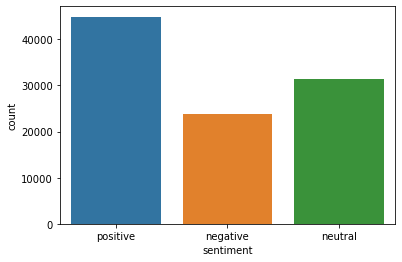

In [105]:
sns.countplot(x='sentiment', data = df2)
plt.show()

In [106]:
# Undersampling the majority classes to the minority class for a balanced classification
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df2[df2.sentiment=='positive']
df_minority1 = df2[df2.sentiment=='neutral']
df_minority2 = df2[df2.sentiment=='negative']

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=23648,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority1, df_minority2])
 
# Display new class counts
df_downsampled.sentiment.value_counts()

neutral     31304
negative    23801
positive    23648
Name: sentiment, dtype: int64

In [107]:
df_downsampled

,text,sentiment
1307412,anybody want buy send new memory card need like,positive
1024636,beautiful ladies run marathon awesome,positive
461663,gorgeous outside indoors hope great day,positive
753904,grace not,positive
803254,hatch pete premier live think already please reply,positive
...,...,...
71976,sad tho not long til,negative
338430,not come excite,negative
419484,nasty lady,negative
298380,surround people hate math,negative


In [108]:
df_downsampled_majority = df_downsampled[df_downsampled.sentiment=='neutral']
df_downsampled_minority1 = df_downsampled[df_downsampled.sentiment=='positive']
df_downsampled_minority2 = df_downsampled[df_downsampled.sentiment=='negative']

 
# Downsample majority class
df_majority_downsampled = resample(df_downsampled_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=23648,     # to match minority class
                                 random_state=123) # reproducible results

In [109]:
df_downsampled_minority1

,text,sentiment
1307412,anybody want buy send new memory card need like,positive
1024636,beautiful ladies run marathon awesome,positive
461663,gorgeous outside indoors hope great day,positive
753904,grace not,positive
803254,hatch pete premier live think already please reply,positive
...,...,...
1539480,thank follow,positive
87896,never always forget something head back need feed hat,positive
1250778,presser start think still want,positive
924672,wear woolly comfy warm,positive


In [110]:
# Combine minority class with downsampled majority class
df_downsampled1 = pd.concat([df_majority_downsampled, df_downsampled_minority1, df_downsampled_minority2])
 
# Display new class counts
df_downsampled1.sentiment.value_counts()

negative    23801
neutral     23648
positive    23648
Name: sentiment, dtype: int64

In [111]:
df3 = df_downsampled1.copy()

In [112]:
df3

,text,sentiment
945201,intuitive,neutral
1421805,finish prep two teach church today,neutral
336768,since not even wake,neutral
991102,big day shop work,neutral
689051,sprinkle bust long line home watch,neutral
...,...,...
71976,sad tho not long til,negative
338430,not come excite,negative
419484,nasty lady,negative
298380,surround people hate math,negative


In [113]:
df3.sentiment.value_counts()

negative    23801
neutral     23648
positive    23648
Name: sentiment, dtype: int64

In [114]:
from wordcloud import WordCloud

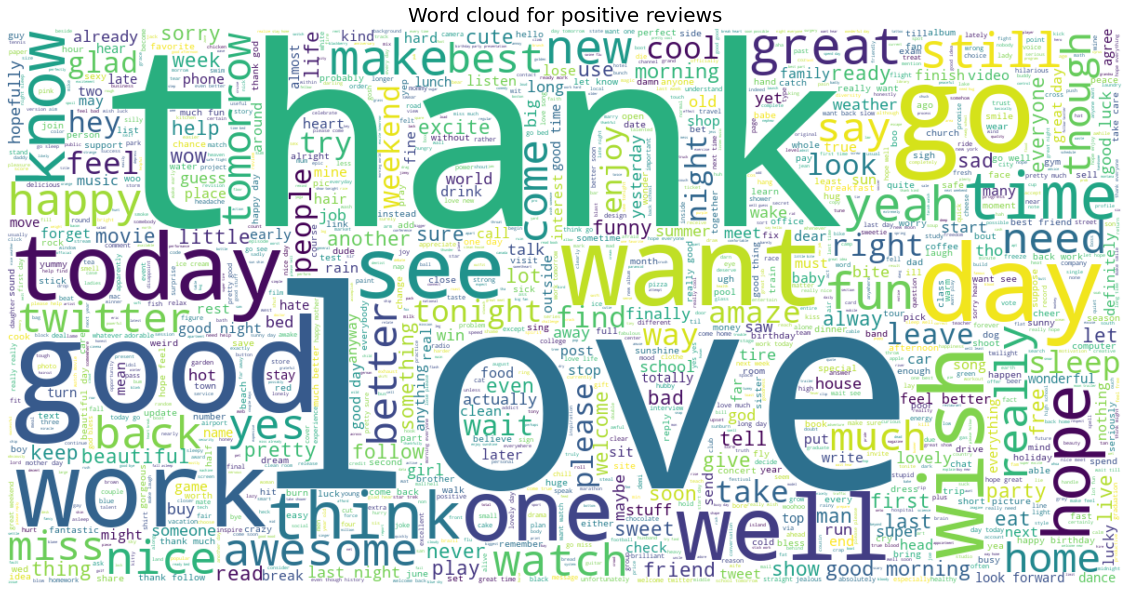

In [115]:
#word cloud for positive reviews
positive_data = df3[df3.sentiment == 'positive']['text']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

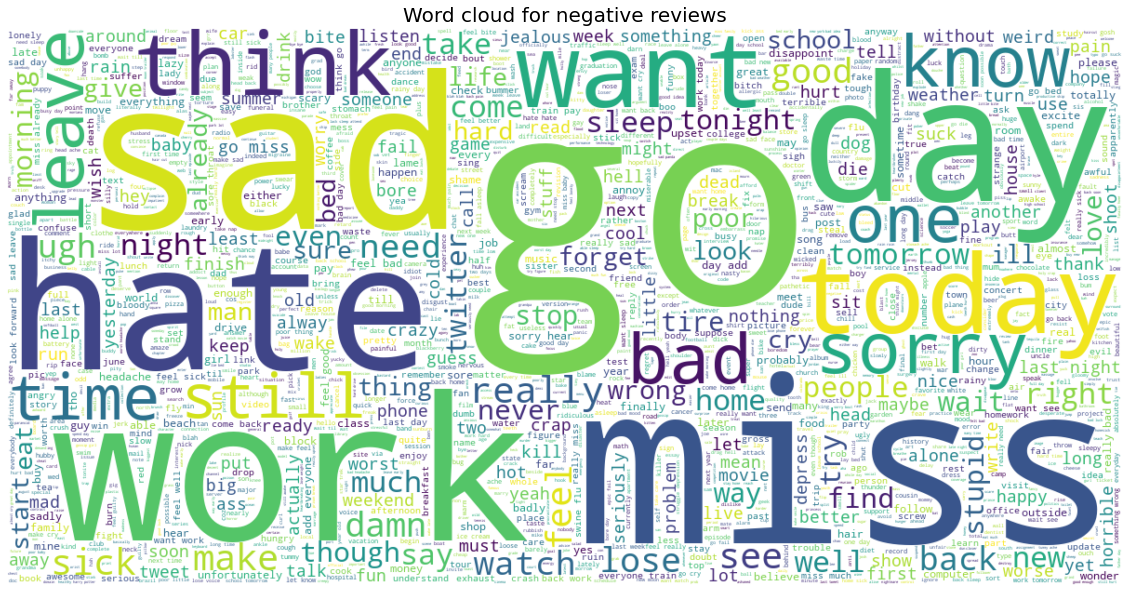

In [116]:
#word cloud for negative reviews
negative_data = df3[df3.sentiment == 'negative']['text']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

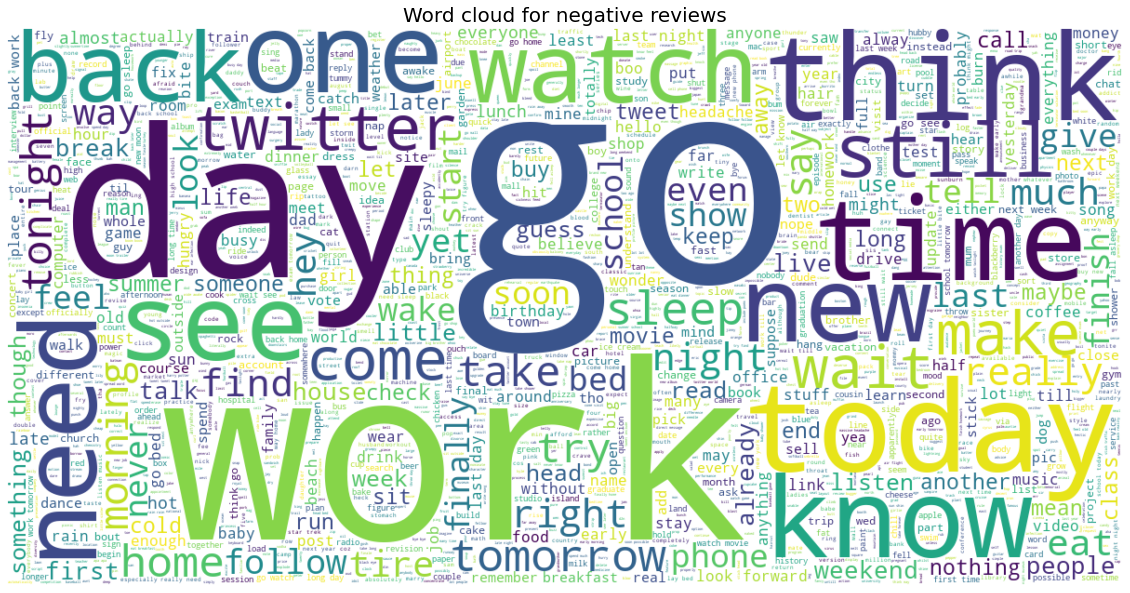

In [117]:
#word cloud for negative reviews
negative_data = df3[df3.sentiment == 'neutral']['text']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

In [118]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df3.text)
corpus[:5]

['intuitive', 'finish', 'prep', 'two', 'teach']

In [119]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

,corpus,countv
0,not,13651
1,get,8190
2,go,5526
3,work,4086
4,day,3940
5,good,3541
6,cannot,3246
7,like,3210
8,today,3131
9,time,2998


In [120]:
df3["char_count"] = df3["text"].apply(lambda x: len(str(x)))

In [121]:
df3

,text,sentiment,char_count
945201,intuitive,neutral,9
1421805,finish prep two teach church today,neutral,34
336768,since not even wake,neutral,19
991102,big day shop work,neutral,17
689051,sprinkle bust long line home watch,neutral,34
...,...,...,...
71976,sad tho not long til,negative,20
338430,not come excite,negative,15
419484,nasty lady,negative,10
298380,surround people hate math,negative,25


In [122]:
# sorting the accuracy in ascending order
df3= df3.sort_values('char_count')
df3

,text,sentiment,char_count
1021405,go,neutral,2
181035,go,neutral,2
1149738,go,neutral,2
784673,go,neutral,2
73222,do,neutral,2
...,...,...,...
938320,healthy butcher exclusive cheese sexy bread lovely beer super sparkly wine apple tango inside belly,positive,99
807538,boom boom clap boom clap clap boom boom clap boom clap clap boom boom clap boom clap clap know song,neutral,99
299880,time call day busy day ahead office meet photo shoot virtual tour shoot softball abdomen could heal,negative,99
37726,back pain cannot turn leave right freely leave wrist pain also stomach pain everywhere pain pain die soon,negative,105


In [123]:
# Removing 2 letter words as they will not be important for sentiment classification as seen above
def remove_short(text):
    """
    Removes URLs in text
    
    Parameters
    -------------------
    text: variable containing df1 text
    
    Returns
    -------------------
    A clean review without 1 or 2 letter words
    """
    pattern = re.compile(r'\W*\b\w{1,2}\b')
    return pattern.sub(r' ', text)

In [124]:
df3['text'] = df3['text'].apply(remove_short)

In [125]:
df3

,text,sentiment,char_count
1021405,,neutral,2
181035,,neutral,2
1149738,,neutral,2
784673,,neutral,2
73222,,neutral,2
...,...,...,...
938320,healthy butcher exclusive cheese sexy bread lovely beer super sparkly wine apple tango inside belly,positive,99
807538,boom boom clap boom clap clap boom boom clap boom clap clap boom boom clap boom clap clap know song,neutral,99
299880,time call day busy day ahead office meet photo shoot virtual tour shoot softball abdomen could heal,negative,99
37726,back pain cannot turn leave right freely leave wrist pain also stomach pain everywhere pain pain die soon,negative,105


In [126]:
# replacng balnk entries with NAN
df3['text'].replace(' ', np.nan, inplace=True)

In [127]:
df3

,text,sentiment,char_count
1021405,NaN,neutral,2
181035,NaN,neutral,2
1149738,NaN,neutral,2
784673,NaN,neutral,2
73222,NaN,neutral,2
...,...,...,...
938320,healthy butcher exclusive cheese sexy bread lovely beer super sparkly wine apple tango inside belly,positive,99
807538,boom boom clap boom clap clap boom boom clap boom clap clap boom boom clap boom clap clap know song,neutral,99
299880,time call day busy day ahead office meet photo shoot virtual tour shoot softball abdomen could heal,negative,99
37726,back pain cannot turn leave right freely leave wrist pain also stomach pain everywhere pain pain die soon,negative,105


In [128]:
# dropping NA values
df3.dropna(subset=['text'], inplace=True)

In [129]:
df3

,text,sentiment,char_count
783557,get,neutral,3
317747,not,neutral,3
724921,boa,neutral,3
567281,sad,negative,3
1082037,eat,neutral,3
...,...,...,...
938320,healthy butcher exclusive cheese sexy bread lovely beer super sparkly wine apple tango inside belly,positive,99
807538,boom boom clap boom clap clap boom boom clap boom clap clap boom boom clap boom clap clap know song,neutral,99
299880,time call day busy day ahead office meet photo shoot virtual tour shoot softball abdomen could heal,negative,99
37726,back pain cannot turn leave right freely leave wrist pain also stomach pain everywhere pain pain die soon,negative,105


In [130]:
df3 = df3[['text', 'sentiment']]
df3

,text,sentiment
783557,get,neutral
317747,not,neutral
724921,boa,neutral
567281,sad,negative
1082037,eat,neutral
...,...,...
938320,healthy butcher exclusive cheese sexy bread lovely beer super sparkly wine apple tango inside belly,positive
807538,boom boom clap boom clap clap boom boom clap boom clap clap boom boom clap boom clap clap know song,neutral
299880,time call day busy day ahead office meet photo shoot virtual tour shoot softball abdomen could heal,negative
37726,back pain cannot turn leave right freely leave wrist pain also stomach pain everywhere pain pain die soon,negative


In [131]:
df3["word_count"] = df3["text"].apply(lambda x: len(str(x).split()))
df3

,text,sentiment,word_count
783557,get,neutral,1
317747,not,neutral,1
724921,boa,neutral,1
567281,sad,negative,1
1082037,eat,neutral,1
...,...,...,...
938320,healthy butcher exclusive cheese sexy bread lovely beer super sparkly wine apple tango inside belly,positive,15
807538,boom boom clap boom clap clap boom boom clap boom clap clap boom boom clap boom clap clap know song,neutral,20
299880,time call day busy day ahead office meet photo shoot virtual tour shoot softball abdomen could heal,negative,17
37726,back pain cannot turn leave right freely leave wrist pain also stomach pain everywhere pain pain die soon,negative,18


In [132]:
# sorting the accuracy in ascending order
df3= df3.sort_values('word_count')
df3

,text,sentiment,word_count
783557,get,neutral,1
813689,tweet,neutral,1
1158742,thank,positive,1
960676,thank,positive,1
777494,thank,positive,1
...,...,...,...
37726,back pain cannot turn leave right freely leave wrist pain also stomach pain everywhere pain pain die soon,negative,18
344218,today not good day apart kill little bird row bloke would not read simple sign sign say not knock,negative,19
634371,get breath back not good final leg journey home strong head wind way get sting lip fly sting thing,positive,19
595306,bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad day,negative,20


# Machine Learning

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [134]:
# The tweet is chosen as the feature(X) and the sentiment as the label(Y) we wish to predict.
X = df3['text']
Y = df3['sentiment']

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=10) # random_state implies a seed to 
                                                                                            # reproduce the same result
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(56815,) (56815,)
(14204,) (14204,)


In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Taking  the top 50000 features and converting them to tfidf vectors with a combination of unigram and bigram
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2)) 

In [137]:
# transforms clean_text to feature vectors
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# RANDOM FOREST

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train_tfidf,Y_train) # training the model using random forest

RandomForestClassifier()

In [140]:
# testing the model
p=rf_model.predict(X_test_tfidf)

In [141]:
# Printing Accuracy, confusion matrix and classification report
print('Accuracy', accuracy_score(p,Y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,Y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(p,Y_test))

Accuracy 0.8987609124190369
-----------------------------------------
Confusion Matrix
[[4046   23  477]
 [ 224 4733  156]
 [ 550    8 3987]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.84      0.89      0.86      4546
     neutral       0.99      0.93      0.96      5113
    positive       0.86      0.88      0.87      4545

    accuracy                           0.90     14204
   macro avg       0.90      0.90      0.90     14204
weighted avg       0.90      0.90      0.90     14204



# Naive bayes

In [142]:
from sklearn.naive_bayes import MultinomialNB
nb_model= MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train) # training the model using Multinomial Naive Bayes

MultinomialNB()

In [143]:
p2=nb_model.predict(X_test_tfidf)

In [144]:
# Printing Accuracy, confusion matrix and classification report
print('Accuracy', accuracy_score(p2,Y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p2,Y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(p2,Y_test))

Accuracy 0.834342438749648
-----------------------------------------
Confusion Matrix
[[3946  254  690]
 [ 333 4225  250]
 [ 541  285 3680]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.82      0.81      0.81      4890
     neutral       0.89      0.88      0.88      4808
    positive       0.80      0.82      0.81      4506

    accuracy                           0.83     14204
   macro avg       0.83      0.83      0.83     14204
weighted avg       0.83      0.83      0.83     14204



# SVM

In [145]:
from sklearn.svm import LinearSVC

In [146]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, Y_train) # training the model using SVM

LinearSVC()

In [147]:
p3=svm_model.predict(X_test_tfidf)

In [148]:
# Printing Accuracy, confusion matrix and classification report
print('Accuracy', accuracy_score(p3,Y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p3,Y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(p3,Y_test))

Accuracy 0.9127006477048719
-----------------------------------------
Confusion Matrix
[[4195   21  458]
 [ 155 4735  128]
 [ 470    8 4034]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.87      0.90      0.88      4674
     neutral       0.99      0.94      0.97      5018
    positive       0.87      0.89      0.88      4512

    accuracy                           0.91     14204
   macro avg       0.91      0.91      0.91     14204
weighted avg       0.91      0.91      0.91     14204



## Accuracy of machine learning models

In [149]:
# Accuracy of random forest model
rf_model_acc = rf_model.score(X_test_tfidf,Y_test)*100

# Accuracy of naive bayes model
nb_model_acc = nb_model.score(X_test_tfidf, Y_test)*100

# Accuracy of SVM model
svm_model_acc = svm_model.score(X_test_tfidf, Y_test)*100

In [150]:
# Creating a dataframe of the models and its accuracy for plotting
model_data = {'Model':['Random Forest', 'Naive Bayes', 'SVM'],
        'Accuracy':[rf_model_acc, nb_model_acc, svm_model_acc]}
 
# Create DataFrame
model_df = pd.DataFrame(model_data)
model_df

,Model,Accuracy
0,Random Forest,89.876091
1,Naive Bayes,83.434244
2,SVM,91.270065


In [151]:
# sorting the accuracy in ascending order
model_df_sorted= model_df.sort_values('Accuracy')

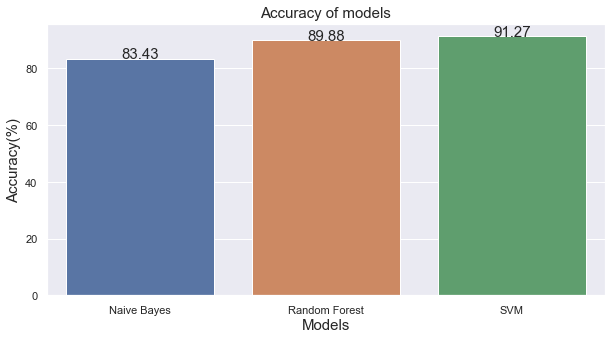

In [152]:
# Plotting a bar chart to show the performnce of each model
sns.set(rc={'figure.figsize':(10,5)})

bar_plots = sns.barplot(x= "Model", y= "Accuracy", data = model_df_sorted)
 
for bar in bar_plots.patches:
    bar_plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha = 'center', va ='center',
                   size=15,  xytext=(0, 4),
                   textcoords='offset points')

# Names for the x axis, y axis and the title
plt.xlabel("Models", size =15)
plt.ylabel("Accuracy(%)", size=15)
plt.title("Accuracy of models", size = 15)
plt.show()

# Deep Learning

In [208]:
# Importing Libraries

import tensorflow as tf
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, SpatialDropout1D
from tensorflow.keras.layers import SpatialDropout1D, Conv1D, GlobalMaxPooling1D 
from keras.metrics import Precision, Recall

In [209]:
# Importing train test splilt library 
from sklearn.model_selection import train_test_split

# Train-Test Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=10)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [210]:
# Train and test data dimensions
X_train.shape, X_test.shape

((56815,), (14204,))

In [211]:
# Declaring train labels
train_labels = Y_train
test_labels = Y_test

In [212]:
# Converting labels to numerical features
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['negative' 'neutral' 'positive']
(array([0, 1, 2]), array([18981, 18806, 19028], dtype=int64))
(array([0, 1, 2]), array([4820, 4764, 4620], dtype=int64))


In [213]:
test_labels

array([1, 2, 1, ..., 2, 1, 1])

In [214]:
# Changing labels to categorical features
import numpy as np
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(np.asarray(train_labels))
test_labels = to_categorical(np.array(test_labels))

# Tokenizing Sentences and Fixing Sentence Length

### Preparing the input features for training

Converting the text words into arrays form.

Maximum 10000 features/words were selected for training. These 10000 words will be selected on the importance that will distinguish between the positive tweets, negative and neutral tweets.

In [215]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 60  
max_words = 10000   

# Tokenizing tweets/sentences wrt num_words
tokenizer = Tokenizer(num_words = max_words, oov_token = "<oov>")  # Selects most frequent words 
tokenizer.fit_on_texts(X_train)      # Develops internal vocab based on training text
train_sequences = tokenizer.texts_to_sequences(X_train)  # converts text to sequence

test_sequences = tokenizer.texts_to_sequences(X_test)

In [216]:
# Fixing the sequence length 
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(train_sequences, maxlen = max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen = max_sequence_length)
X_train.shape, X_test.shape

((56815, 60), (14204, 60))

# 1. LSTM

## Deep Learning Model - Long Short Term Memory networks (LSTM)

Long Short Term Memory networks LSTMs are a special kind of RNN, capable of learning long-term dependencies. 

LSTMs are designed to avoid the long-term dependency problem. Remembering information for long periods of time is their default behavior.

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way source.

As optimizer we use the adam and the fitting goal is to maximize the model's accuracy, hence we use a checkpointer Keras function for that to save the best model. Furthemore, the earlyStopping function will be utlized to avoid overfitting.

As the loss / coss function since we have categorical variables to be predicted we used the categorical_crossentropy loss function.

In every epoch the DL model will be evaluated in the validation set. If the accuracy improves in the new epoch the model will be saved. But after 2 iterations of no improvement the model the fitting will be stopped.

In [217]:
embedding_dim = 32  

In [218]:
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, embedding_dim,input_length=max_sequence_length))
lstm_model.add(SpatialDropout1D(0.7))
lstm_model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
lstm_model.add(Dense(24, activation='relu'))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 60, 32)            320000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 60, 32)           0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_5 (Dense)             (None, 24)                1560      
                                                                 
 dense_6 (Dense)             (None, 3)                 75        
                                                                 
Total params: 346,467
Trainable params: 346,467
Non-trainable params: 0
________________________________________________

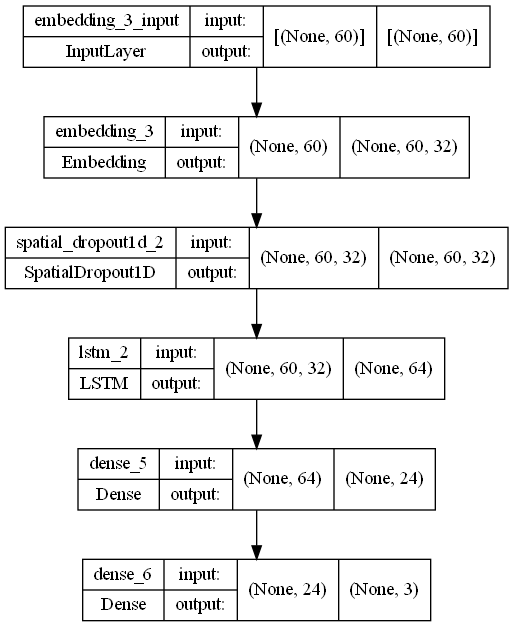

In [219]:
tf.keras.utils.plot_model(lstm_model, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [220]:
from keras.callbacks import EarlyStopping
#batch_size = 50
history1 = lstm_model.fit(X_train, train_labels, epochs=10, batch_size=64,validation_data=(X_test, test_labels),
                          callbacks=[EarlyStopping(monitor='val_loss', mode ="min", patience = 2, min_delta=0.0001,
                                                   restore_best_weights = True, verbose = 1)])

Epoch 1/10
888/888 [==============================] - 52s 56ms/step - loss: 0.8170 - accuracy: 0.5956 - val_loss: 0.4545 - val_accuracy: 0.8319
Epoch 2/10
888/888 [==============================] - 53s 59ms/step - loss: 0.5064 - accuracy: 0.7850 - val_loss: 0.3130 - val_accuracy: 0.8833
Epoch 3/10
888/888 [==============================] - 53s 59ms/step - loss: 0.4007 - accuracy: 0.8383 - val_loss: 0.2632 - val_accuracy: 0.9023
Epoch 4/10
888/888 [==============================] - 53s 60ms/step - loss: 0.3469 - accuracy: 0.8609 - val_loss: 0.2326 - val_accuracy: 0.9157
Epoch 5/10
888/888 [==============================] - 53s 60ms/step - loss: 0.3134 - accuracy: 0.8770 - val_loss: 0.2159 - val_accuracy: 0.9211
Epoch 6/10
888/888 [==============================] - 53s 59ms/step - loss: 0.2851 - accuracy: 0.8884 - val_loss: 0.1977 - val_accuracy: 0.9271
Epoch 7/10
888/888 [==============================] - 53s 60ms/step - loss: 0.2658 - accuracy: 0.8960 - val_loss: 0.1826 - val_accuracy:

In [221]:
loss, lstm_accuracy = lstm_model.evaluate(X_test, test_labels)
print("loss", loss)
print('Accuracy  : {:.4f}'.format(lstm_accuracy))

444/444 [==============================] - 6s 13ms/step - loss: 0.1633 - accuracy: 0.9397
loss 0.16331499814987183
Accuracy  : 0.9397


In [222]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

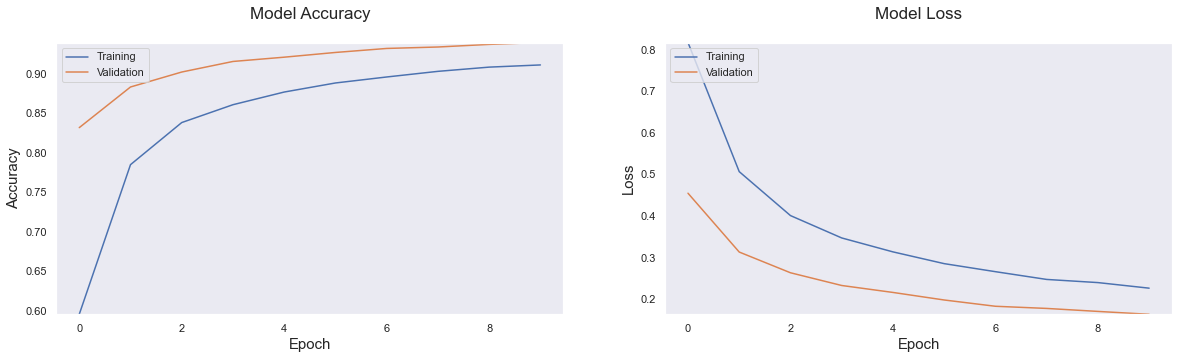

In [223]:
#Accuracy / Validation_Accuracy  and Loss / Validation_Loss Plot

plot_performance(history=history1)

In [224]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

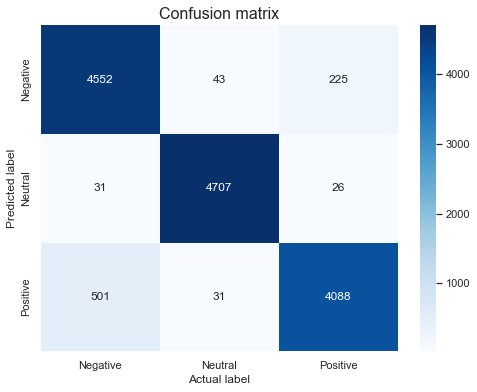

In [225]:
plot_confusion_matrix(lstm_model, X_test, test_labels)

# Testing

In [226]:
text = ['This is a great place']
text = tokenizer.texts_to_sequences(text)
text = pad_sequences(text, maxlen=max_sequence_length)
res = lstm_model.predict(text)
res

array([[6.5924479e-03, 3.1301586e-04, 9.9309456e-01]], dtype=float32)

In [227]:
if np.argmax(res) == 0:
    print("Negative Comment")
elif np.argmax(res) == 1:
    print("Neutral Comment")
elif np.argmax(res) == 2:
    print("Positive Comment")

Positive Comment


In [228]:
text1 = ['I know who you are']
text1 = tokenizer.texts_to_sequences(text1)
text1 = pad_sequences(text1, maxlen=max_sequence_length)
res2 = lstm_model.predict(text1)
res2

array([[0.01461564, 0.98316634, 0.00221809]], dtype=float32)

In [229]:
if np.argmax(res2) == 0:
    print("Negative Comment")
elif np.argmax(res2) == 1:
    print("Neutral Comment")
elif np.argmax(res2) == 2:
    print("Positive Comment")

Neutral Comment


# 2. BI-LSTM

In Keras, we can define our deep network as a sequence of layers. 

+ Embedding Layer - modifies the integer representation of words into dense vectors
+ Bidirectional LSTM Layer - connects two hidden layers of opposite directions to the same output
+ Dense Layer - output layer with softmax activation

## Deep Learning Model - Bidirectional Long Short Term Memory networks (BiLSTM)

Adam optimizer is used and the fitting goal is to maximize the model's accuracy, hence we use a checkpointer Keras function for that to save the best model. Furthemore, the earlyStopping function will be utlized to avoid overfitting

As the loss / coss function since we have categorical variables to be predicted we used the categorical_crossentropy loss function.

In every epoch the DL model will be evaluated in the validation set. If the accuracy improves in the new epoch the model will be saved. But after 2 iterations of no improvement the model the fitting will be stopped.


In [230]:
# Model Parameters
embedding_dim = 32  

# Model Training
bilstm_model = Sequential()
bilstm_model.add(Embedding(max_words, embedding_dim,input_length=max_sequence_length))

# Bidirectional LSTM 
bilstm_model.add(Bidirectional(LSTM(32, return_sequences=True, dropout=0.4, recurrent_dropout=0)))   

bilstm_model.add(GlobalMaxPool1D())
bilstm_model.add(Dense(24, activation='relu'))
bilstm_model.add(Dense(3,activation='softmax'))  

bilstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 60, 32)            320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 64)           16640     
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 24)                1560      
                                                                 
 dense_8 (Dense)             (None, 3)                 75        
                                                                 
Total params: 338,275
Trainable params: 338,275
Non-tr

In [231]:
bilstm_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

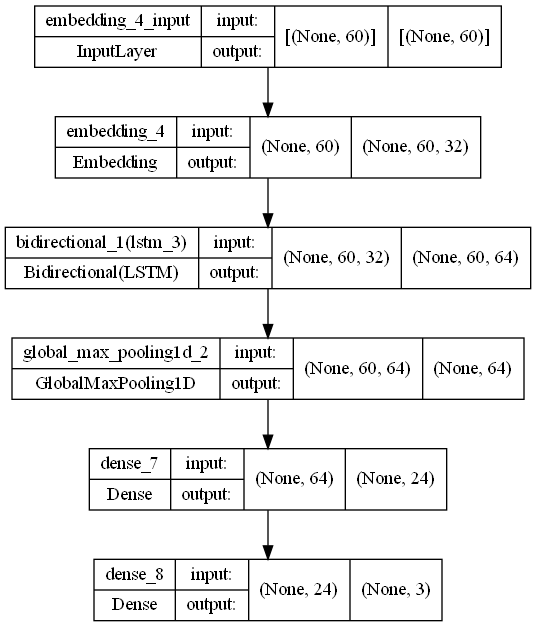

In [232]:
tf.keras.utils.plot_model(bilstm_model, to_file='model_test1.png', show_shapes=True, show_layer_names=True)

In [233]:
history = bilstm_model.fit(X_train, train_labels, epochs=10, batch_size=64,validation_data=(X_test, test_labels),
                    callbacks=[EarlyStopping(monitor='val_loss', mode ="min", patience = 2, min_delta=0.0001,
                                                   restore_best_weights = True, verbose = 1)])

Epoch 1/10
888/888 [==============================] - 53s 53ms/step - loss: 0.4704 - accuracy: 0.7961 - val_loss: 0.2158 - val_accuracy: 0.9287
Epoch 2/10
888/888 [==============================] - 35s 40ms/step - loss: 0.1678 - accuracy: 0.9425 - val_loss: 0.1437 - val_accuracy: 0.9478
Epoch 3/10
888/888 [==============================] - 34s 38ms/step - loss: 0.1047 - accuracy: 0.9626 - val_loss: 0.1254 - val_accuracy: 0.9580
Epoch 4/10
888/888 [==============================] - 34s 38ms/step - loss: 0.0761 - accuracy: 0.9734 - val_loss: 0.1228 - val_accuracy: 0.9632
Epoch 5/10
888/888 [==============================] - 34s 38ms/step - loss: 0.0609 - accuracy: 0.9793 - val_loss: 0.1251 - val_accuracy: 0.9627
Epoch 6/10
888/888 [==============================] - 34s 38ms/step - loss: 0.0524 - accuracy: 0.9822 - val_loss: 0.1255 - val_accuracy: 0.9648
Epoch 6: early stopping


In [234]:
len(history.history['loss'])

6

In [235]:
loss, bilstm_accuracy = bilstm_model.evaluate(X_test, test_labels)
print("loss", loss)
print('Accuracy  : {:.4f}'.format(bilstm_accuracy))

444/444 [==============================] - 3s 7ms/step - loss: 0.1228 - accuracy: 0.9632
loss 0.12277495861053467
Accuracy  : 0.9632


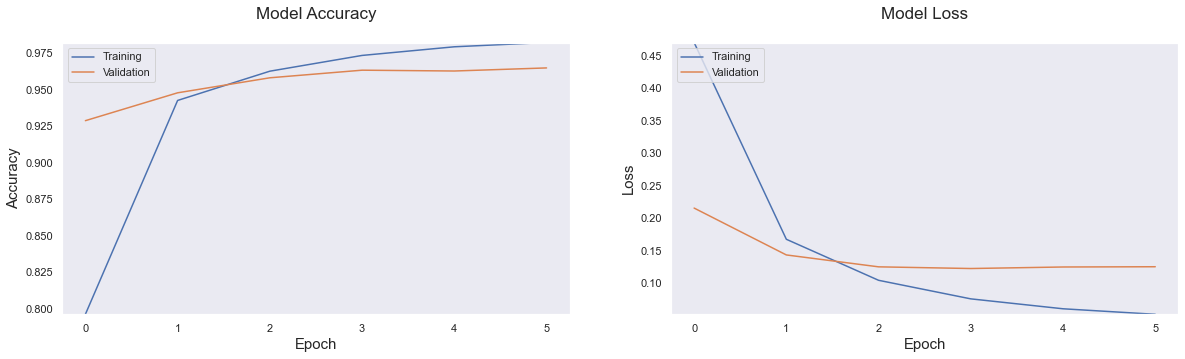

In [236]:
#Accuracy / Validation_Accuracy  and Loss / Validation_Loss Plot

plot_performance(history=history)

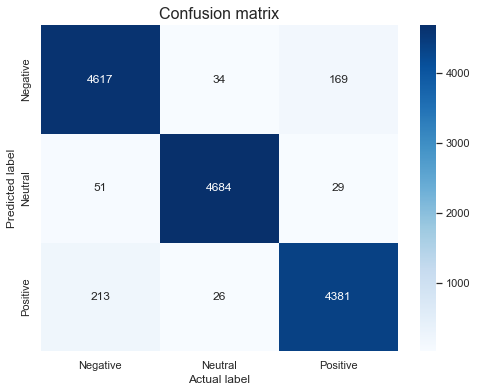

In [237]:
plot_confusion_matrix(bilstm_model, X_test, test_labels)

In [238]:
text = ['This is going very bad']

In [239]:
text = tokenizer.texts_to_sequences(text)
text

[[1, 1, 1, 1, 38]]

In [240]:
text = pad_sequences(text, maxlen=max_sequence_length)
text

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1, 38]])

In [241]:
res1 = bilstm_model.predict(text)
res1

array([[9.9876654e-01, 6.9794722e-04, 5.3554645e-04]], dtype=float32)

In [242]:
np.argmax(res1)

0

In [243]:
if np.argmax(res1) == 0:
    print("Negative Comment")
elif np.argmax(res1) == 1:
    print("Neutral Comment")
elif np.argmax(res1) == 2:
    print("Positive Comment")

Negative Comment


# CNN

## Deep Learning Models - Convolutional Neural Networks

Convolutional Neural Networks are very famous for applications in image classification. The whole idea about ConvNets stems from the notion that by adding more and more layers to the network the DL model can understand more and more features from an image and categotize it easier and more efficiently source. Moreover, the same architecture presents great results with Text classification problems source.

In [244]:
# CNN architecture: consist of layers of neurons stacked on top of one another 
n_conv = 256 
k_conv = 3 

# Dense layer architecture: fully connected neurons where each neuron is connected to
# every neuron before its layer
n_dense = 256
dropout = 0.2
drop_embed = 0.7

In [245]:
# pooling layers reduce data size and drop out layers reduce overfitting

cnn_model = Sequential()
cnn_model.add(Embedding(max_words, embedding_dim,input_length=max_sequence_length))
cnn_model.add(SpatialDropout1D(drop_embed))
cnn_model.add(Conv1D(n_conv, k_conv, activation='relu'))
cnn_model.add(GlobalMaxPool1D())
cnn_model.add(Dense(3,activation='softmax'))  

In [246]:
cnn_model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 60, 32)            320000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 60, 32)           0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 58, 256)           24832     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 3)                 771       
                                                                 
Total params: 345,603
Trainable params: 345,603
Non-tr

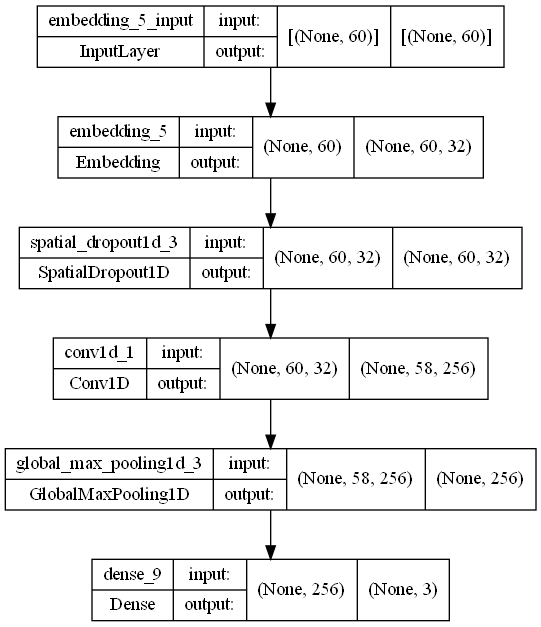

In [247]:
tf.keras.utils.plot_model(cnn_model, to_file='model_test2.png', show_shapes=True, show_layer_names=True)

In [248]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [249]:
history2 = cnn_model.fit(X_train, train_labels, epochs=10, batch_size=64,validation_data=(X_test, test_labels),
                    callbacks=[EarlyStopping(monitor='val_loss', mode ="min", patience = 2, min_delta=0.0001,
                                                   restore_best_weights = True, verbose = 1)])

Epoch 1/10
888/888 [==============================] - 17s 19ms/step - loss: 0.5313 - accuracy: 0.7876 - val_loss: 0.2650 - val_accuracy: 0.9085
Epoch 2/10
888/888 [==============================] - 16s 18ms/step - loss: 0.2682 - accuracy: 0.9139 - val_loss: 0.1940 - val_accuracy: 0.9329
Epoch 3/10
888/888 [==============================] - 16s 18ms/step - loss: 0.2134 - accuracy: 0.9301 - val_loss: 0.1770 - val_accuracy: 0.9374
Epoch 4/10
888/888 [==============================] - 16s 18ms/step - loss: 0.1887 - accuracy: 0.9380 - val_loss: 0.1666 - val_accuracy: 0.9426
Epoch 5/10
888/888 [==============================] - 16s 18ms/step - loss: 0.1676 - accuracy: 0.9452 - val_loss: 0.1613 - val_accuracy: 0.9469
Epoch 6/10
888/888 [==============================] - 16s 18ms/step - loss: 0.1554 - accuracy: 0.9490 - val_loss: 0.1587 - val_accuracy: 0.9470
Epoch 7/10
888/888 [==============================] - 16s 18ms/step - loss: 0.1458 - accuracy: 0.9521 - val_loss: 0.1532 - val_accuracy:

In [250]:
loss, cnn_accuracy = cnn_model.evaluate(X_test, test_labels)
print("loss", loss)
print('Accuracy  : {:.4f}'.format(cnn_accuracy))

444/444 [==============================] - 1s 3ms/step - loss: 0.1517 - accuracy: 0.9505
loss 0.15172293782234192
Accuracy  : 0.9505


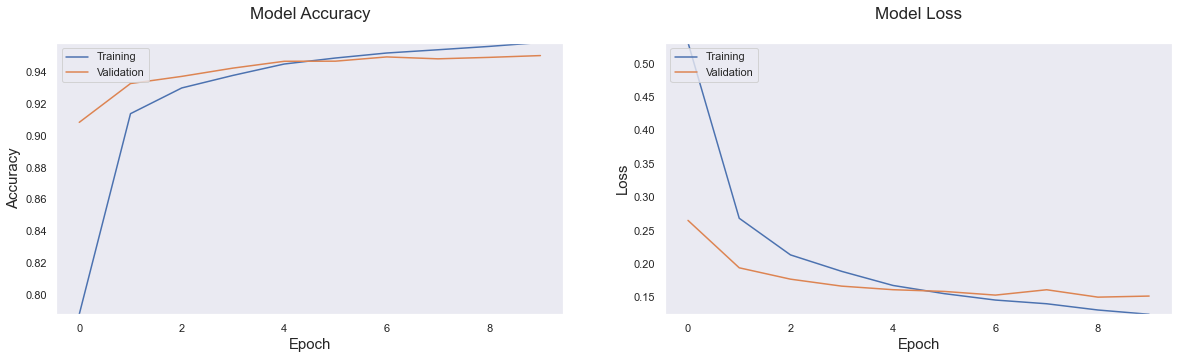

In [251]:
#Accuracy / Validation_Accuracy  and Loss / Validation_Loss Plot

plot_performance(history=history2)

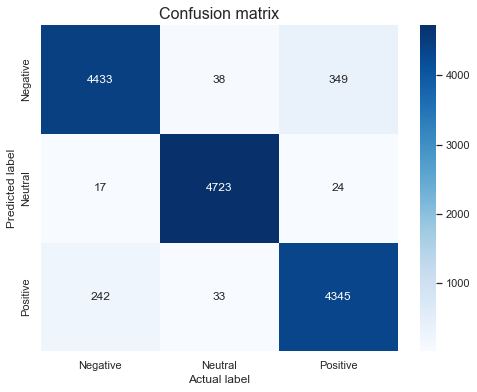

In [252]:
plot_confusion_matrix(cnn_model, X_test, test_labels)

## Accuracy of deep learning models

In [253]:
lstm_model_acc = lstm_accuracy*100
bilstm_model_acc = bilstm_accuracy*100
cnn_model_acc = cnn_accuracy*100

In [254]:
# Creating a dataframe of the models and its accuracy for plotting
model_data = {'Model':['LSTM', 'BiLSTM', 'CNN'],
        'Accuracy':[lstm_model_acc, bilstm_model_acc, cnn_model_acc]}
 
# Create DataFrame
nn_model_df = pd.DataFrame(model_data)
nn_model_df

,Model,Accuracy
0,LSTM,93.966490
1,BiLSTM,96.324980
2,CNN,95.050693


In [255]:
# sorting the accuracy in ascending order
nn_model_df_sorted= nn_model_df.sort_values('Accuracy')

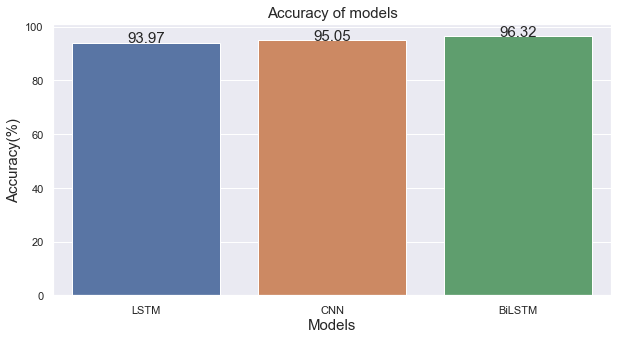

In [256]:
# Plotting a bar chart to show the performnce of each model
sns.set(rc={'figure.figsize':(10,5)})

bar_plots = sns.barplot(x= "Model", y= "Accuracy", data = nn_model_df_sorted)
 
for bar in bar_plots.patches:
    bar_plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha = 'center', va ='center',
                   size=15,  xytext=(0, 4),
                   textcoords='offset points')

# Names for the x axis, y axis and the title
plt.xlabel("Models", size =15)
plt.ylabel("Accuracy(%)", size=15)
plt.title("Accuracy of models", size = 15)
plt.show()

### Joining accuracy of both machine learning and deep learning models

In [257]:
frames = [model_df, nn_model_df]
result = pd.concat(frames)

In [258]:
result

,Model,Accuracy
0,Random Forest,89.876091
1,Naive Bayes,83.434244
2,SVM,91.270065
0,LSTM,93.966490
1,BiLSTM,96.324980
2,CNN,95.050693


In [259]:
# sorting the accuracy in ascending order
all_model_df_sorted= result.sort_values('Accuracy')

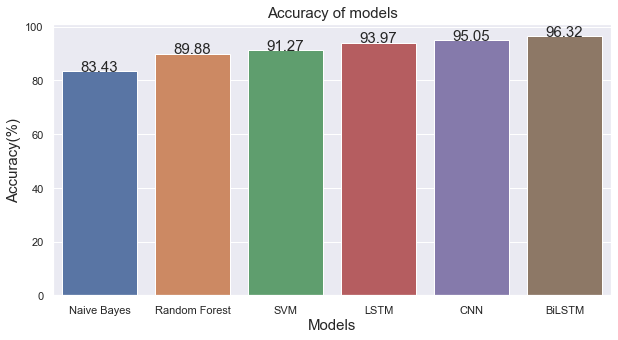

In [260]:
# Plotting a bar chart to show the performnce of each model
sns.set(rc={'figure.figsize':(10,5)})

bar_plots = sns.barplot(x= "Model", y= "Accuracy", data = all_model_df_sorted)
 
for bar in bar_plots.patches:
    bar_plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha = 'center', va ='center',
                   size=15,  xytext=(0, 4),
                   textcoords='offset points')

# Names for the x axis, y axis and the title
plt.xlabel("Models", size =15)
plt.ylabel("Accuracy(%)", size=15)
plt.title("Accuracy of models", size = 15)
plt.show()